## week04_assignment: Assessing the numbers of housing units in LA Chinatown over the years
#### name: Jiaqi Li

In this assignment, I will investigate the parcel data in Chinatown from 2006-2021, to see if the housing units for residential types have increased over the years(which is an indicator for growth of multi-family units). 

##### First, we will import necessary libraries and conduct analysis on a test dataset (2006).

In [1]:
#import libraries
import pandas
import geopandas
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
#import data in geojson file, for the parcel data of 2006
parcel_2006 = geopandas.read_file("Assessor_Parcels_Data_2006_TRA.geojson")

In [4]:
# get the info of the data
parcel_2006.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 142 columns):
 #    Column                       Dtype              
---   ------                       -----              
 0    OBJECTID_1                   float64            
 1    AIN                          object             
 2    APN                          object             
 3    SitusHouse                   object             
 4    SitusFract                   object             
 5    SitusDirec                   object             
 6    SitusUnit                    object             
 7    SitusStree                   object             
 8    SitusAddre                   object             
 9    SitusCity                    object             
 10   SitusZIP                     object             
 11   SitusFullA                   object             
 12   TaxRateAre                   object             
 13   TaxRateCit                   object             
 14 

In [6]:
# get the first few rows of the data
parcel_2006.head(3)

OBJECTID_1         AIN           APN SitusHouse SitusFract SitusDirec  \
0   1245695.0  5414007015  5414-007-015        999       None          N   
1   1244222.0  5406028127  5406-028-127        918       None          W   
2   1244952.0  5409016030  5409-016-030        908       None       None   

  SitusUnit  SitusStree              SitusAddre       SitusCity  ...  \
0      None    BROADWAY          999 N BROADWAY  LOS ANGELES CA  ...   
1       317  COLLEGE ST  918 W COLLEGE ST   317  LOS ANGELES CA  ...   
2      None    AVILA ST            908 AVILA ST  LOS ANGELES CA  ...   

  StreetDirection  StreetName UnitNo            City ZIPcode5           rowID  \
0               N    BROADWAY         LOS ANGELES CA  90012.0  20065414007015   
1               W  COLLEGE ST    317  LOS ANGELES CA  90012.0  20065406028127   
2                    AVILA ST         LOS ANGELES CA  90012.0  20065409016030   

  CENTER_LAT_y CENTER_LON_y                    Location 1  \
0    34.066669  -118.236365  (34.06666874, -118.23636466)   
1    34.066379  -118.245243  (34.06637901, -118.24524342)   
2    34.057575  -118.232612   (34.0575754, -118.23261206)   

                                            geometry  
0  POLYGON Z ((-118.23615 34.06662 0.00000, -118....  
1  POLYGON Z ((-118.24515 34.06608 0.00000, -118....  
2  POLYGON Z ((-118.23247 34.05774 0.00000, -118....  

[3 rows x 142 columns]

Now we have got all the information of this particular dataset of 2006.

#### 1.1 The goal of the first section my assignment is to:
1. show the units distribution for different residential types
2. show the change of units distribution over the years by using the loop function

First, we keep the columns needed to achieve the first goal.

In [7]:
# For my individual assignment, with this data for the year 2006, define the columns to keep
columns_to_keep = ['UseType','YearBuilt','Units','geometry']

In [8]:
# Create new dataframe with chosen columns
parcel_2006_clipped = parcel_2006[columns_to_keep]

<AxesSubplot: >

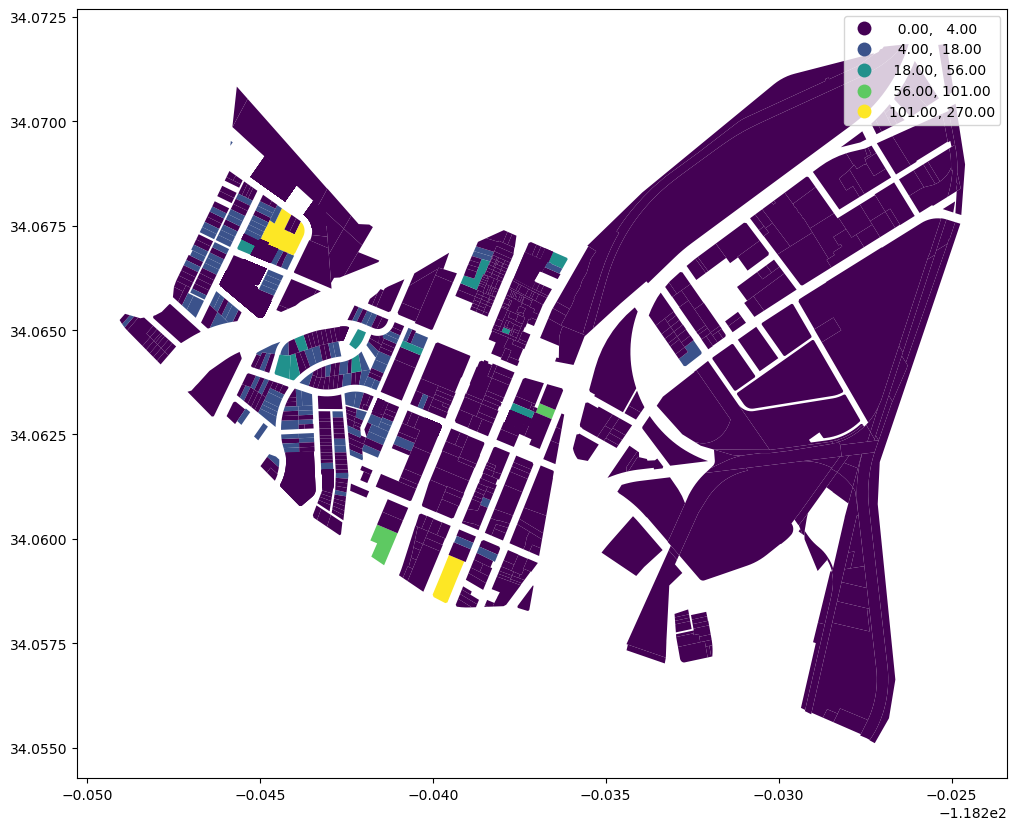

In [9]:
# Map to see what unit density looks like
parcel_2006_clipped.plot(figsize=(12,10),
                   column='Units',
                   legend=True,
                   scheme='NaturalBreaks')

The above map shows unit density for all use types in the year 2006.

However, we are particularly interested in the 'residential' type and the 'commercial' type. Therefore, now I need to query for the data in these two types.

In [10]:
# Querying for residential type
parcel_2006_residential = parcel_2006_clipped[columns_to_keep].copy()
parcel_2006_residential = parcel_2006_residential[parcel_2006_clipped.UseType == 'Residential']
parcel_2006_residential

UseType  YearBuilt  Units  \
1     Residential       1988      1   
3     Residential       1989      1   
4     Residential       1965      2   
5     Residential       1989      1   
8     Residential       1971      7   
...           ...        ...    ...   
1086  Residential       1992     56   
1087  Residential       1990      6   
1088  Residential       1988      1   
1091  Residential       1969      1   
1094  Residential       1976      1   

                                               geometry  
1     POLYGON Z ((-118.24515 34.06608 0.00000, -118....  
3     POLYGON Z ((-118.24270 34.06474 0.00000, -118....  
4     POLYGON Z ((-118.24245 34.06255 0.00000, -118....  
5     POLYGON Z ((-118.24344 34.06743 0.00000, -118....  
8     POLYGON Z ((-118.24161 34.06537 0.00000, -118....  
...                                                 ...  
1086  POLYGON Z ((-118.24430 34.06440 0.00000, -118....  
1087  POLYGON Z ((-118.24202 34.06192 0.00000, -118....  
1088  POLYGON Z ((-118.24515 34.06608 0.00000, -118....  
1091  POLYGON Z ((-118.24505 34.06715 0.00000, -118....  
1094  POLYGON Z ((-118.24569 34.06632 0.00000, -118....  

[544 rows x 4 columns]

In [11]:
# Querying for commercial type
parcel_2006_commercial = parcel_2006_clipped[columns_to_keep].copy()
parcel_2006_commercial = parcel_2006_commercial[parcel_2006_clipped.UseType == 'Commercial']
parcel_2006_commercial

UseType  YearBuilt  Units  \
0     Commercial       1964     36   
7     Commercial       1968      0   
11    Commercial       1950      0   
19    Commercial       1983      1   
24    Commercial       1983      1   
...          ...        ...    ...   
1080  Commercial       1967      0   
1083  Commercial       1983      1   
1085  Commercial       1940      0   
1090  Commercial       1947      0   
1092  Commercial       1982      1   

                                               geometry  
0     POLYGON Z ((-118.23615 34.06662 0.00000, -118....  
7     POLYGON Z ((-118.23809 34.06499 0.00000, -118....  
11    POLYGON Z ((-118.23815 34.06671 0.00000, -118....  
19    POLYGON Z ((-118.23974 34.06269 0.00000, -118....  
24    POLYGON Z ((-118.23974 34.06269 0.00000, -118....  
...                                                 ...  
1080  POLYGON Z ((-118.23205 34.05804 0.00000, -118....  
1083  POLYGON Z ((-118.23974 34.06269 0.00000, -118....  
1085  POLYGON Z ((-118.23683 34.06559 0.00000, -118....  
1090  POLYGON Z ((-118.23846 34.06609 0.00000, -118....  
1092  POLYGON Z ((-118.23715 34.06287 0.00000, -118....  

[333 rows x 4 columns]

Now we would like to see what the unit density looks like for residential type and commercial type on map.

<AxesSubplot: >

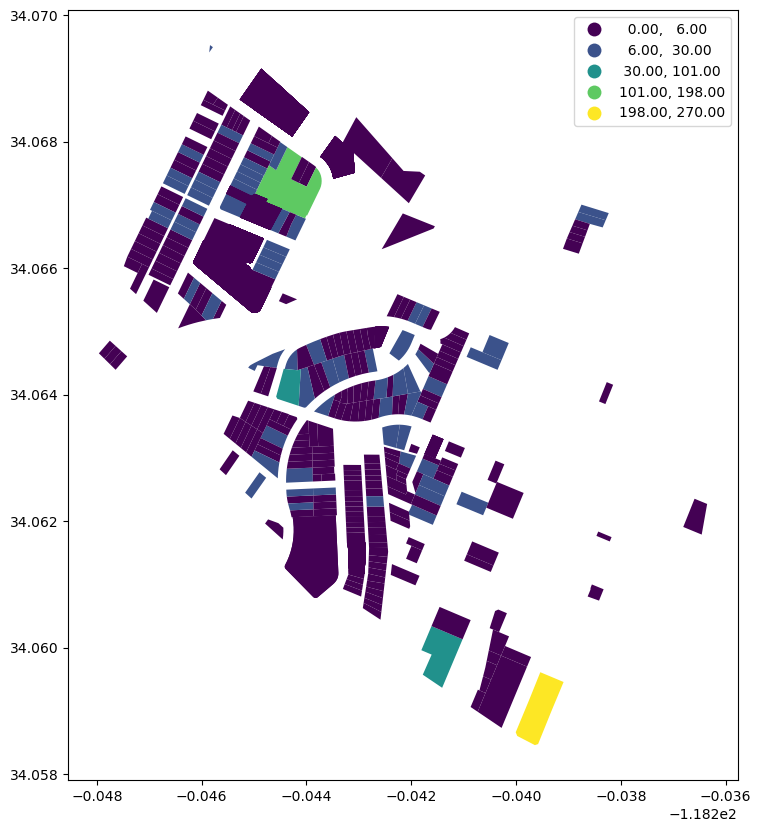

In [12]:
# Map to see what unit density looks like for residential type
parcel_2006_residential.plot(figsize=(12,10),
                   column='Units',
                   legend=True,
                   scheme='NaturalBreaks')

<AxesSubplot: >

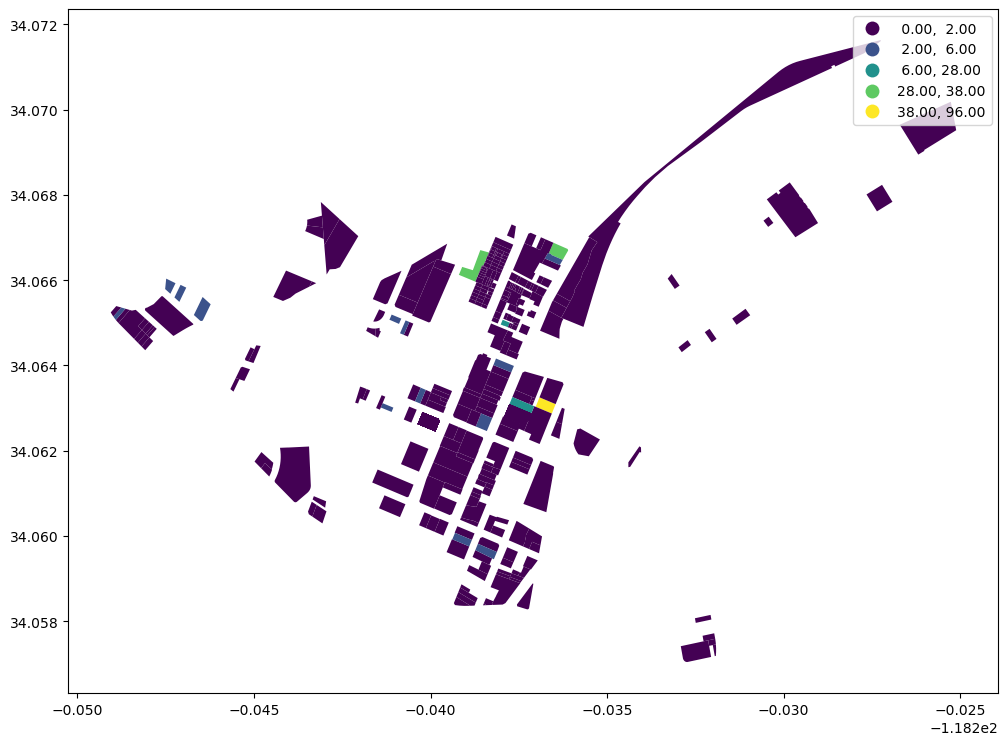

In [13]:
# Map to see what unit density looks like for commercial type
parcel_2006_commercial.plot(figsize=(12,10),
                   column='Units',
                   legend=True,
                   scheme='NaturalBreaks')

Now we have created two graphics to indicate the units location/density for residential and commercial type in LA Chinatown, in the year 2006.

#### 1.2 Creating a loop to show the change of unit density for the residential and commercial type

To show the changes of unit density over the years, I adopt a four-year interval and aim to create five maps using the parcel data of 2006, 2010, 2014, 2018, 2021. There is no up-to-date data for 2022(which should be the correct interval), so I used the 2021 one instead.

This is our second goal.

In [14]:
# Create an array of the selected five year point using for loop
parcel_dataframe_residential = []
parcel_dataframe_commercial = []

yearframe = [2006, 2010, 2014, 2018, 2021]  # define the five years of the dataset we want
for year in yearframe:
    parcel_data_filepath = "Assessor_Parcels_Data_" + str(year) + "_TRA.geojson"
    parcel_dataframe_raw = geopandas.read_file(parcel_data_filepath) # read all datasets and combine them
    parcel_residential = parcel_dataframe_raw[columns_to_keep].copy() # define the columns to keep for the residential type
    parcel_residential = parcel_residential[parcel_dataframe_raw.UseType == 'Residential']
    parcel_commercial = parcel_dataframe_raw[columns_to_keep].copy()  # define the columns to keep for the commercial type
    parcel_commercial = parcel_commercial[parcel_dataframe_raw.UseType == 'Commercial']
    parcel_residential['Year'] = year
    parcel_commercial['Year'] = year
    parcel_dataframe_residential.append(parcel_residential) 
    parcel_dataframe_commercial.append(parcel_commercial)
    
# Check the information of the dataset 2018-residential type, for example.
print(parcel_dataframe_residential[3].info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 559 entries, 1 to 1145
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   UseType    559 non-null    object  
 1   YearBuilt  559 non-null    int64   
 2   Units      559 non-null    int64   
 3   geometry   559 non-null    geometry
 4   Year       559 non-null    int64   
dtypes: geometry(1), int64(3), object(1)
memory usage: 26.2+ KB
None


In [15]:
# Check the information of the dataset 2006-commercial type, for example.
print(parcel_dataframe_commercial[0].info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 333 entries, 0 to 1092
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   UseType    333 non-null    object  
 1   YearBuilt  333 non-null    int64   
 2   Units      333 non-null    int64   
 3   geometry   333 non-null    geometry
 4   Year       333 non-null    int64   
dtypes: geometry(1), int64(3), object(1)
memory usage: 15.6+ KB
None


In [16]:
# check all necessary information of the dataset 2006-commercial type, for example.
print(parcel_dataframe_commercial[0].sample(3))

        UseType  YearBuilt  Units  \
357  Commercial       1938      0   
579  Commercial       1978      0   
0    Commercial       1964     36   

                                              geometry  Year  
357  POLYGON Z ((-118.23713 34.06570 0.00000, -118....  2006  
579  POLYGON Z ((-118.23998 34.06048 0.00000, -118....  2006  
0    POLYGON Z ((-118.23615 34.06662 0.00000, -118....  2006  


Now we have all the information to create consecutive maps for both types over the past 20 years.

We will do the loop twice, one for the residential type and the other for the commercial type.

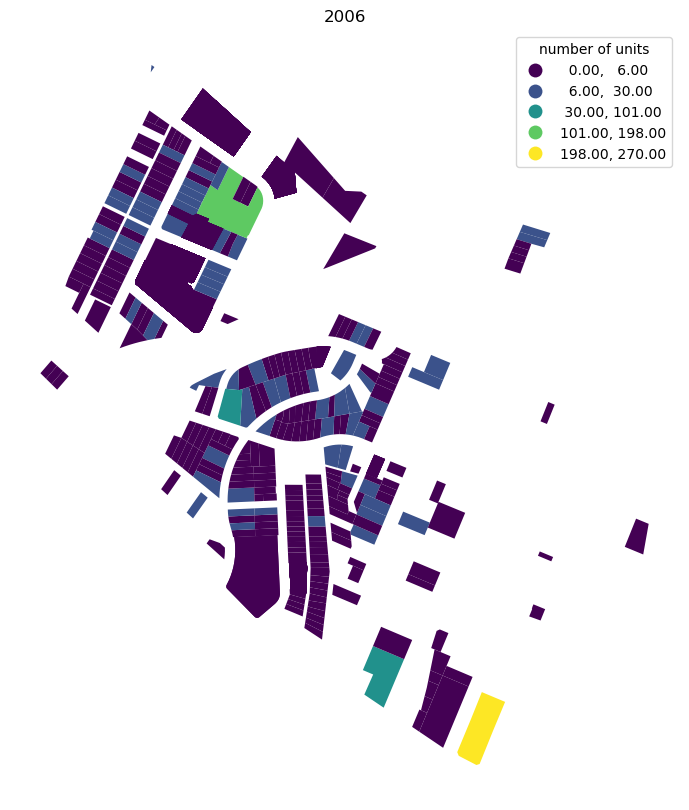

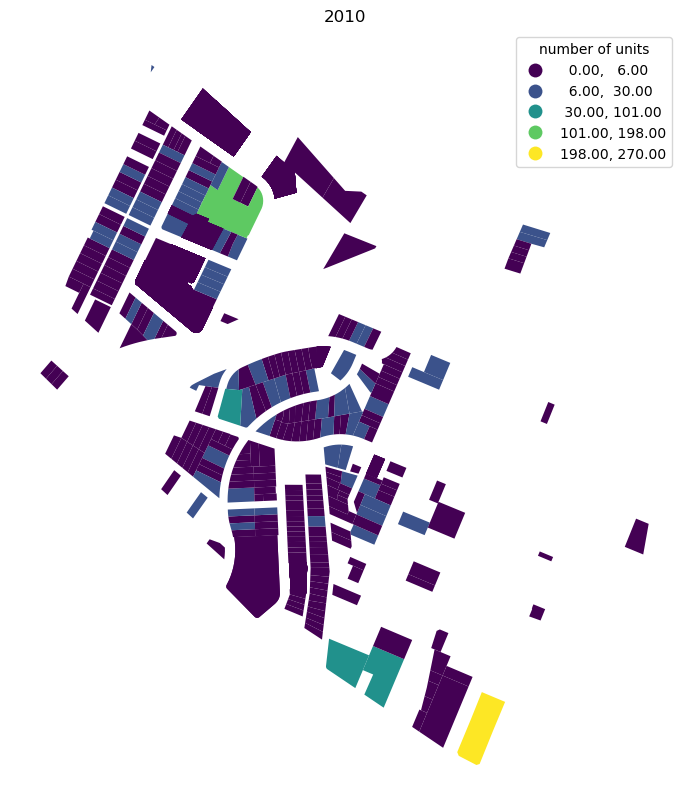

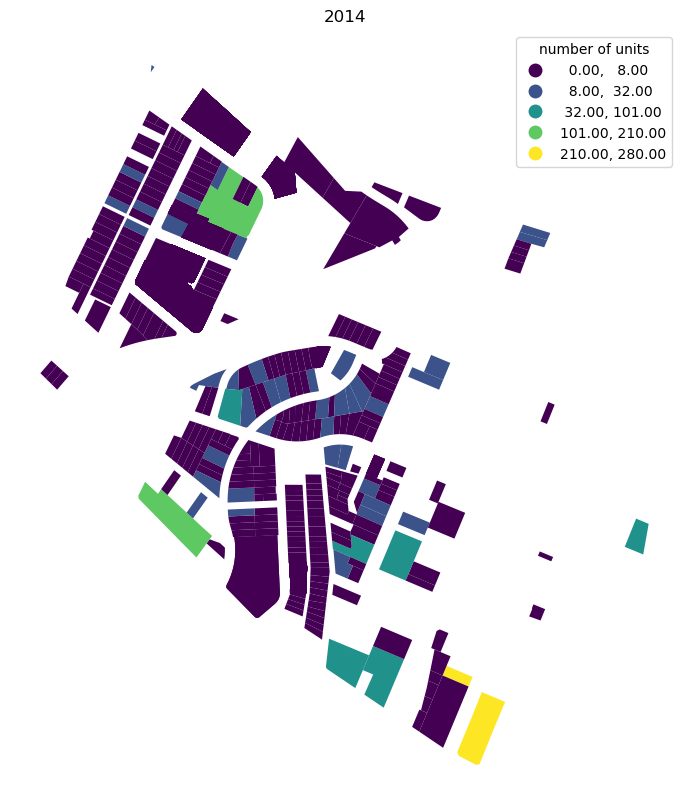

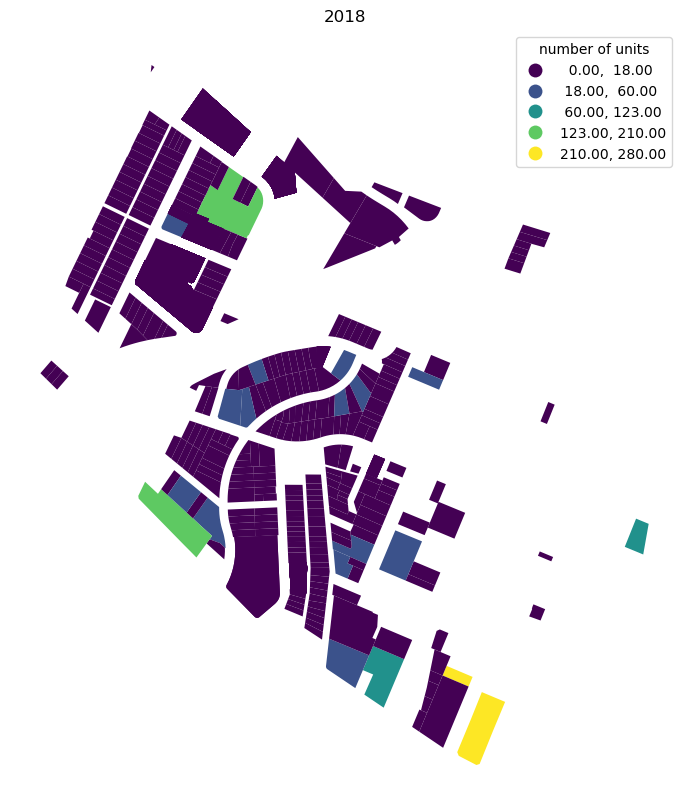

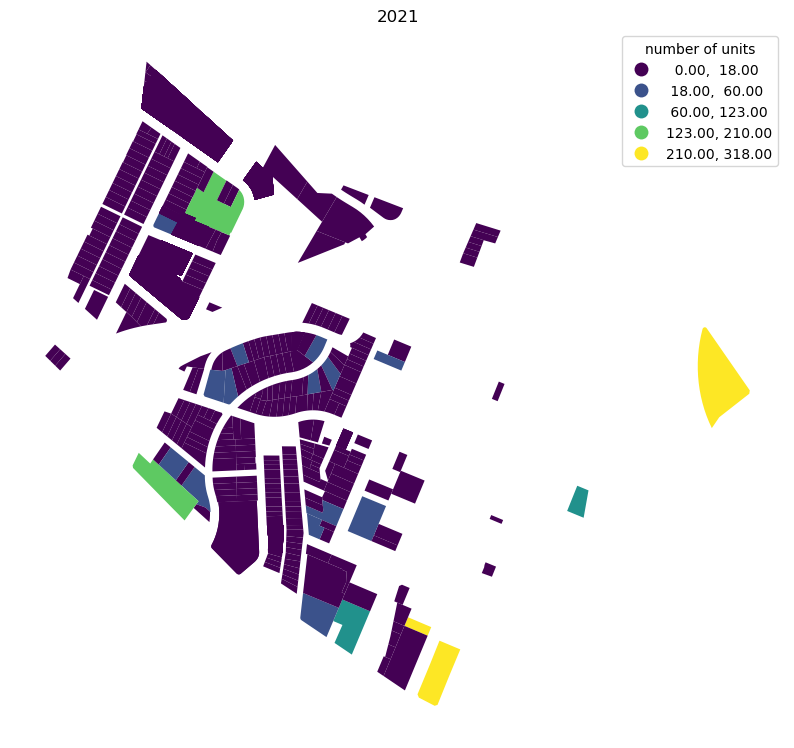

In [17]:
# Create a loop to print out all five maps for unit numbers of the residential type

for parcel_dataframe in parcel_dataframe_residential:
    fig, ax = plt.subplots(figsize=(10,10))
    parcel_dataframe.plot(ax=ax,
                column='Units',
                legend=True,
                scheme='NaturalBreaks',
                         legend_kwds={'title': "number of units"})
    ax.set_title(parcel_dataframe['Year'][1])
    ax.axis('off')

We can see a very clear trend of increased units for residential type of the buildings. In addition, note that in the legend, the automatically generated breaks are different on each map. This means that the increased density of units is even greater than the current visualization. However, I have not found a way to define a set of legends for every map. I will remap this trend in the following weeks.

Now we do the same for the commercial type.

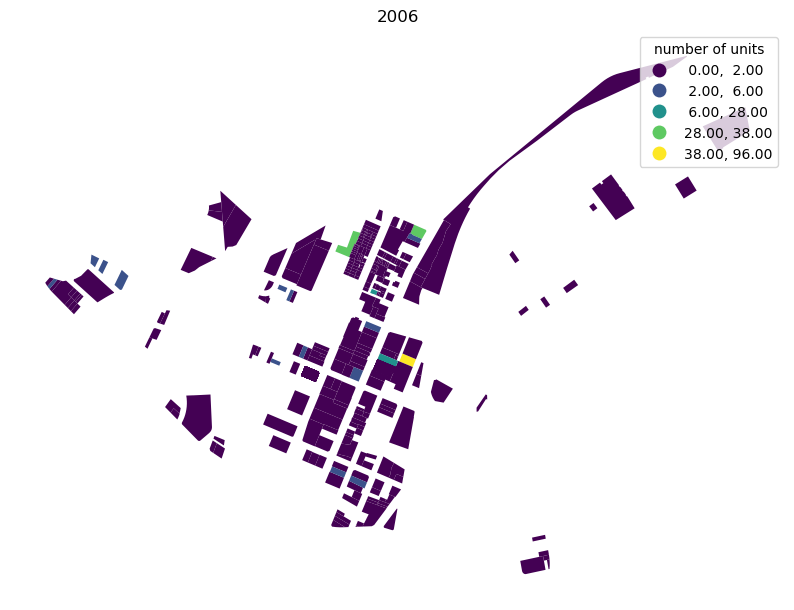

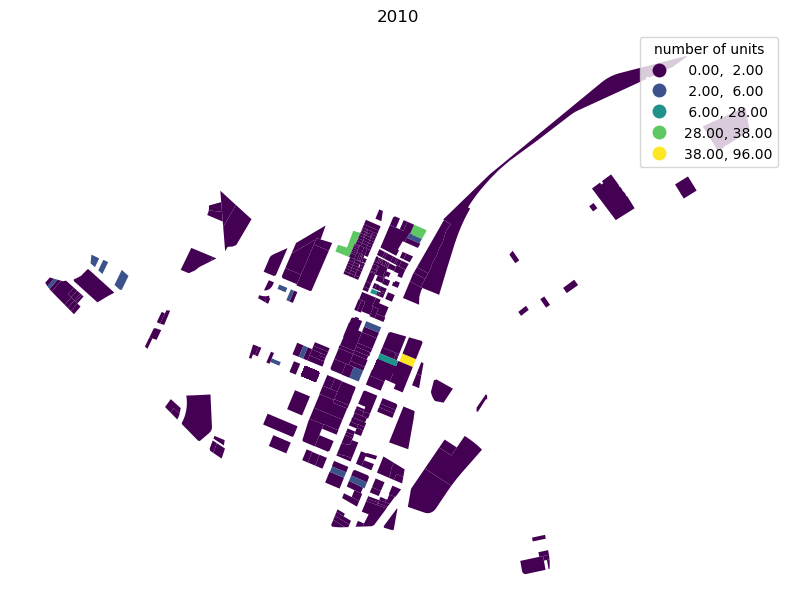

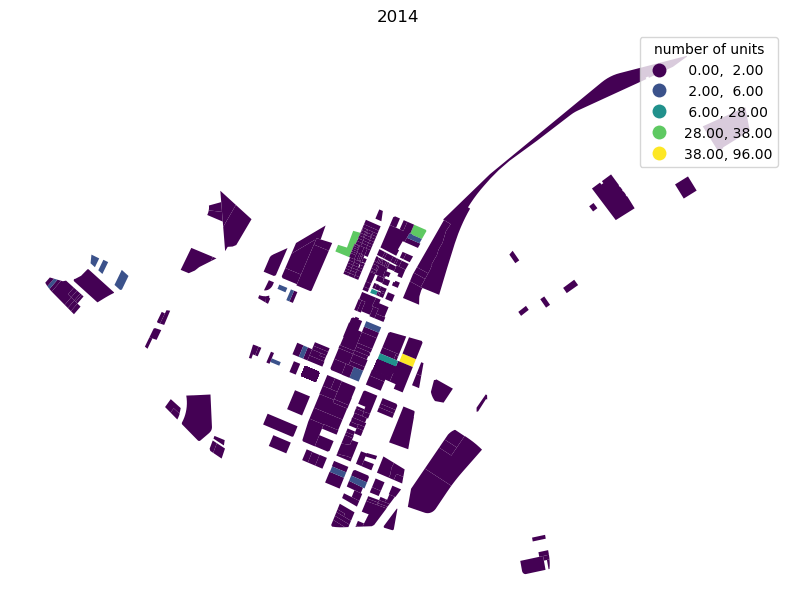

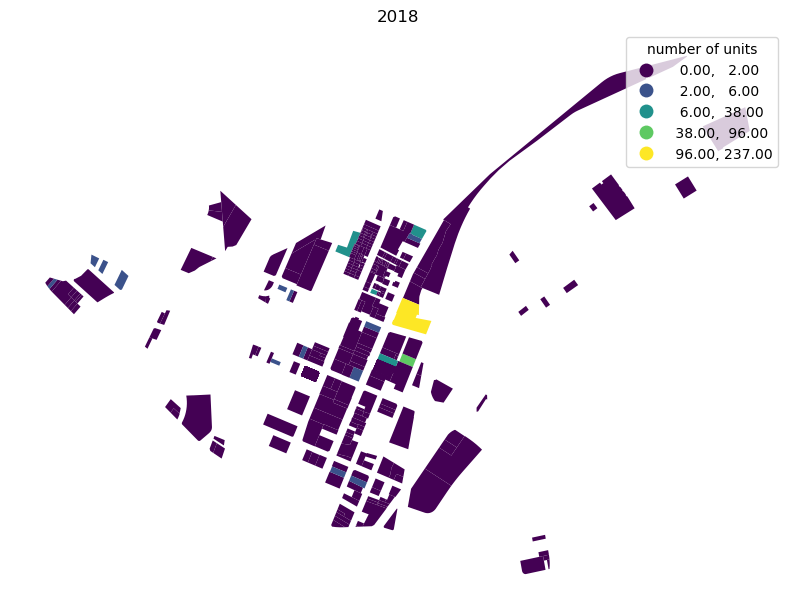

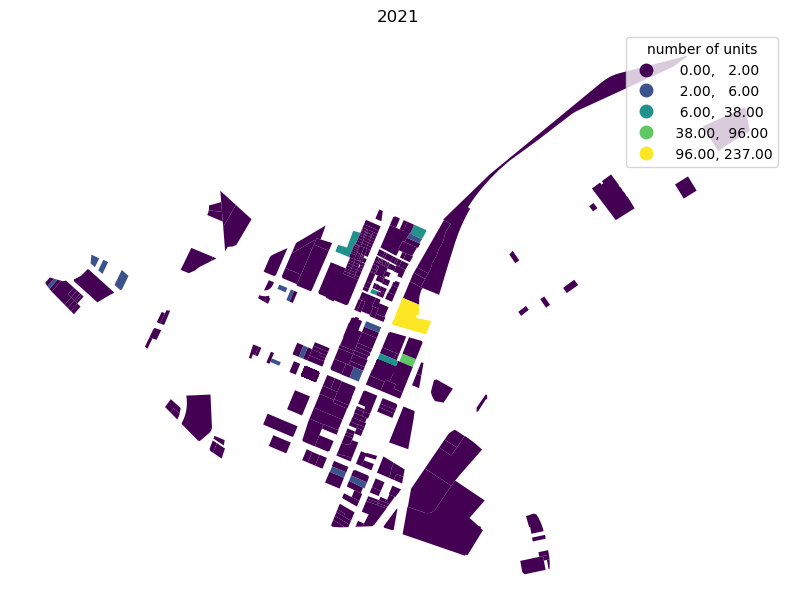

In [18]:
# Create a loop to print out all five maps for unit numbers of the commercial type

for parcel_dataframe in parcel_dataframe_commercial:
    fig, ax = plt.subplots(figsize=(10,10))
    parcel_dataframe.plot(ax=ax,
                column='Units',
                legend=True,
                scheme='NaturalBreaks',
                         legend_kwds={'title': "number of units"})
    ax.set_title(parcel_dataframe['Year'][0])
    ax.axis('off')

#### 2. create a bar chart for the number of units of a building built over time

Next I will try to see if the more recently built buildings tend to have more units. To do so, I will first create a new column that defines different time span of the year built. For this one, I will use the most updated dataset of 2021.

In [19]:
#Break down years into different buckets
# First, take a look at the range and median values for this column
parcel_2021 = geopandas.read_file("Assessor_Parcels_Data_2021_TRA.geojson")
parcel_2021.YearBuilt.describe()

count    1206.000000
mean     1602.377280
std       761.985408
min         0.000000
25%      1907.000000
50%      1965.000000
75%      1983.000000
max      2020.000000
Name: YearBuilt, dtype: float64

In [20]:
# sort the parcels built in different years into five spans
def YearBuilt_span(YearBuilt):
    if (YearBuilt < 1965):
        return "1800 to 1964"
    if (YearBuilt < 1980):
        return "1965 to 1979"
    if (YearBuilt < 1995):
        return "1980 to 1994"
    if (YearBuilt < 2010):
        return "1995 to 2009"
    if (YearBuilt < 2022):
        return "2010 to now"

In [21]:
# Testing for the year 1982
YearBuilt_span(1982)

'1980 to 1994'

Now that we have five time spans, I will add this new column to the original dataset.

In [22]:
# Create a new column for these five spans
parcel_2021['YearBuilt_span'] = parcel_2021['YearBuilt'].map(YearBuilt_span)
parcel_2021['YearBuilt_span'] = parcel_2021['YearBuilt_span'].astype("string")
parcel_2021.sample(3)

OBJECTID_1         AIN           APN SitusHouse SitusFract SitusDirec  \
812   1244190.0  5406028095  5406-028-095        918       None          W   
675   1245715.0  5414009002  5414-009-002        491       None       None   
642   1244791.0  5409002005  5409-002-005       1637       None          N   

    SitusUnit    SitusStree              SitusAddre       SitusCity  ...  \
812       104    COLLEGE ST  918 W COLLEGE ST   104  LOS ANGELES CA  ...   
675      None  GIN LING WAY        491 GIN LING WAY  LOS ANGELES CA  ...   
642      None     SPRING ST        1637 N SPRING ST  LOS ANGELES CA  ...   

       StreetName UnitNo            City ZIPcode5           rowID  \
812    COLLEGE ST    104  LOS ANGELES CA  90012.0  20215406028095   
675  GIN LING WAY   None  LOS ANGELES CA  90012.0  20215414009002   
642     SPRING ST   None  LOS ANGELES CA  90012.0  20215409002005   

    CENTER_LAT_y CENTER_LON_y                    Location 1  \
812    34.066384  -118.245256   (34.06638387, -118.2452556)   
675    34.065865  -118.237722  (34.06586523, -118.23772215)   
642    34.069560  -118.227752  (34.06955999, -118.22775183)   

                                              geometry YearBuilt_span  
812  POLYGON Z ((-118.24515 34.06608 0.00000, -118....   1980 to 1994  
675  POLYGON Z ((-118.23766 34.06593 0.00000, -118....   1800 to 1964  
642  POLYGON Z ((-118.22764 34.06950 0.00000, -118....   1800 to 1964  

[3 rows x 143 columns]

In [23]:
# create a count column for each span
units_built_over_time = parcel_2021.value_counts(['Units','YearBuilt_span', 'UseType']).reset_index(name='count')
units_built_over_time = units_built_over_time.sort_values('YearBuilt_span')
units_built_over_time

Units YearBuilt_span        UseType  count
0        0   1800 to 1964     Commercial    191
21       1   1800 to 1964     Commercial      8
23       0   1800 to 1964  Institutional      7
24       6   1800 to 1964    Residential      7
80      36   1800 to 1964     Commercial      1
..     ...            ...            ...    ...
6        1    2010 to now    Residential     45
84      60    2010 to now    Residential      1
94       4    2010 to now    Residential      1
105      8    2010 to now    Residential      1
113    318    2010 to now    Residential      1

[114 rows x 4 columns]

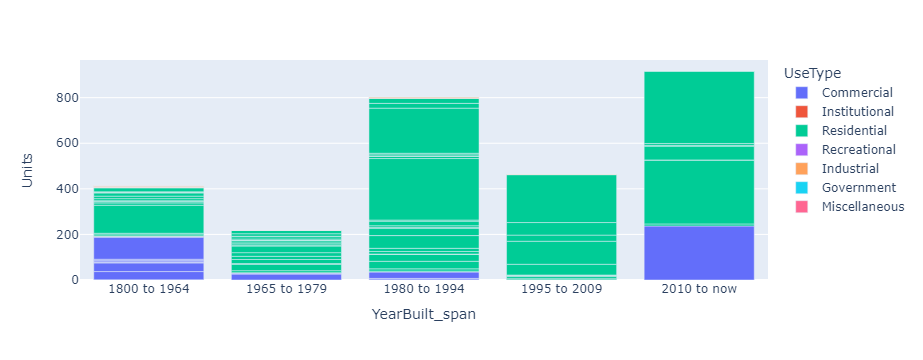

In [24]:
# Plot the counts
fig = px.bar(units_built_over_time,
             x='YearBuilt_span',
             y='Units',
             color='UseType',
             labels = {
                 'Year':'Year',
                 'count':'Units',
                 'YearBuilt':'YearBuilt_span'})
figsize=(20,10)
fig.show()

### Conclusion
We have achieved the goal for this assignment:
- show the change of units distribution for different residential types in 2006, 2010, 2014, 2018, 2021.

In addition, in the second section, we have created a bar chart to show the change of units built for different types(mainly residential and commercial) over the years. We can see that there is a significant increase in commercial units in the past decade. In addition, there are more units built for the residential type in the past few decades. 

This result supports our hypothesis that LA Chinatown has been gentrified over the last few decades. On the one hand, more units are built for the more rencent parcels. On the other hand, both the numbers of commercial and residential types of buildings increase. 